1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━

ValueError: num must be an integer with 1 <= num <= 141, not 142

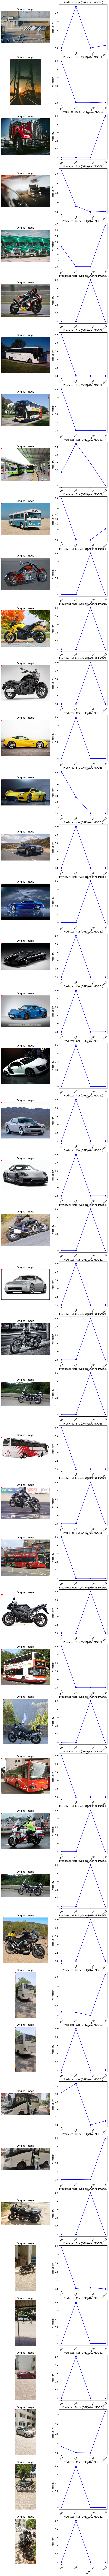

In [2]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model

# Load models
final_model = load_model('final_model.h5')
fuzzy_model = load_model('fuzzy_model.h5')

# Define class labels
class_labels = ['Bus', 'Car', 'Motorcycle', 'Truck']

# Function to preprocess images based on model input size
def preprocess_image(img_path, target_size):
    img = cv2.imread(img_path)
    if img is None:
        raise FileNotFoundError(f"Unable to load image: {img_path}")
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
    img = cv2.resize(img, target_size)
    img = img / 255.0  # Normalize pixel values
    return img

# Load images from test_image folder
test_image_folder = 'images'
test_images = os.listdir(test_image_folder)

# Define the layout of the plot
num_images = len(test_images)
num_models = 2
num_cols = num_models + 1  # Include one column for original images
num_rows = num_images

# Set figure size based on number of images and models
plt.figure(figsize=(num_cols * 5, num_rows * 5))

# Display images and predictions for each model
for i, image_name in enumerate(test_images, start=1):
    image_path = os.path.join(test_image_folder, image_name)
    
    # Preprocess image based on final_model input size
    img_size_final = (256, 256)
    img_final = preprocess_image(image_path, img_size_final)
    img_final = np.expand_dims(img_final, axis=0)
    
    # Preprocess image based on fuzzy_model input size
    img_size_fuzzy = (224, 224)
    img_fuzzy = preprocess_image(image_path, img_size_fuzzy)
    img_fuzzy = np.expand_dims(img_fuzzy, axis=0)
    
    # Make predictions for each model
    predictions_final = final_model.predict(img_final)
    predictions_fuzzy = fuzzy_model.predict(img_fuzzy)
    
    # Get predicted class labels for each model
    predicted_class_label_final = class_labels[np.argmax(predictions_final)]
    predicted_class_label_fuzzy = class_labels[np.argmax(predictions_fuzzy)]
    
    # Original Image
    plt.subplot(num_rows, num_cols, (i-1)*num_cols+1)
    img = cv2.imread(image_path)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB
    plt.title('Original Image')
    plt.axis('off')
    
    # Prediction for final_model
    plt.subplot(num_rows, num_cols, (i-1)*num_cols+2)
    plt.plot(class_labels, predictions_final[0], color='blue', marker='o')
    plt.ylabel('Probability')
    plt.title(f'Predicted: {predicted_class_label_final}\n(ORIGINAL MODEL)')
    plt.xticks(rotation=45)
    
    # Prediction for fuzzy_model
    plt.subplot(num_rows, num_cols, (i-1)*num_cols+3)  # Corrected index
    plt.plot(class_labels, predictions_fuzzy[0], color='red', marker='o')
    plt.ylabel('Probability')
    plt.title(f'Predicted: {predicted_class_label_fuzzy}\n(FUZZY MODEL)')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()
